In [5]:
import pandas as pd

In [ ]:
#mit dummytxt ausprobieren

In [6]:
import json

In [15]:
data = open(r"C:\Users\Momo\Desktop\Staatsangehoerigkeit - Kopie\Data19PlenarDocs\DrittesGesetz\sitzung16Mai.json")
#mit tokenized text arbeiten

In [11]:
print(data)

<_io.TextIOWrapper name='C:\\Users\\Momo\\Desktop\\sitzung16Mai.csv' mode='r' encoding='cp1252'>


In [17]:
plenar16 = json.load(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
plenar16

NameError: name 'plenar16' is not defined

In [12]:
len(plenar16)

1870

In [2]:
import spacy
import re
import torch
import spacy_transformers
import nltk
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
nlp = spacy.load('de_dep_news_trf')
nlp.add_pipe('spacytextblob')

In [2]:
nlp.pipeline

[('transformer',
  <spacy_transformers.pipeline_component.Transformer at 0x1eb8c1c5370>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1eb8c1c5130>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x1eb8c1c5430>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1eb8c097220>),
 ('lemmatizer',
  <spacy.pipeline.edit_tree_lemmatizer.EditTreeLemmatizer at 0x1eb8c1c5730>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1eb8c20a010>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x1eb8c079a10>)]

In [3]:
#schleifen um an drittes element, zweites element zu kommen, weitere verschachtlung um an jeweils sätze zukommen

beitraege = []


for i in range(3, len(plenar16), 5): 
    doc = nlp(plenar16[i])
    beitraege.append(doc.text)

for beitrag in beitraege:
    print("_____________________________________________________________________")
    print(beitrag)



NameError: name 'plenar16' is not defined

In [4]:
sentimentwert = 0
for beitrag in beitraege:
    doc = nlp(beitrag)
    
    for span in doc.sents:
        #doc = nlp(beitrag)
        blob = TextBlob(span.text, analyzer = NaiveBayesAnalyzer())
        print(span, blob.sentiment)
        print (' ')


In [40]:
doc._.polarity

-0.2

In [41]:
doc._.subjectivity

0.6

In [42]:
doc._.assessments

[(['stark'], -0.2, 0.6, None)]

In [45]:
for beitrag in beitraege:
    doc = nlp(beitrag)
    for span in doc.sents:
        print(span.text, span._.polarity)



 0.0
Sehr geehrter Herr Präsident! Liebe Kolleginnen und Kollegen! 0.0
Unser Grundgesetz ist ein Segen der deutschen Geschichte, mehr als die Summe seiner Artikel, mehr als ein historisches Dokument. 0.0
Das Grundgesetz hat die Menschen in Deutschland für sich gewonnen.

 0.0
({0})

Meine Damen und Herren, das Grundgesetz ist heute eine lebendige Verfassung für über 80 Millionen Menschen in unserem Land, und es hat die Menschen im Laufe der Geschichte zweimal für sich gewonnen.

 0.0
Unser Grundgesetz ist entstanden nach nationalsozialistischer Diktatur, nach Krieg und Zerstörung. 0.0
Deutschland war damals seiner geistigen Grundlage beraubt, moralisch gescheitert und entkernt. 0.0
Und es waren einige wenige Entscheidungsträger im Parlamentarischen Rat, die in dieser Stunde mit dem Grundgesetz eine neue Werteordnung geschaffen haben und damit der Bundesrepublik einen ethisch-moralischen, wirtschaftlichen und gesellschaftlichen Neuanfang ermöglicht haben. 0.0
Was damals einer kleinen 

KeyboardInterrupt: 

In [46]:
doc._.blob.sentiment_assessments.assessments

AttributeError: 'NoneType' object has no attribute 'sentiment_assessments'

In [47]:
doc._.blob.ngrams()

AttributeError: 'NoneType' object has no attribute 'ngrams'

In [1]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Annahme: beitraege ist eine Liste von Beiträgen
beitraege = []

# Initialisiere Zählvariablen
positive_count = 0
neutral_count = 0
negative_count = 0

for beitrag in beitraege:
    doc = nlp(beitrag)
    
    for span in doc.sents:
        blob = TextBlob(span.text, analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment.classification
        
        if sentiment == 'pos':
            positive_count += 1
        elif sentiment == 'neg':
            negative_count += 1
        else:
            neutral_count += 1

# Ausgabe der Anzahl der Sentimentwerte
print("Anzahl positiver Sentiments:", positive_count)
print("Anzahl neutraler Sentiments:", neutral_count)
print("Anzahl negativer Sentiments:", negative_count)



Anzahl positiver Sentiments: 0
Anzahl neutraler Sentiments: 0
Anzahl negativer Sentiments: 0


In [ ]:
# Daten für das Tortendiagramm
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_count, neutral_count, negative_count]

# Erstelle ein Tortendiagramm
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'gray', 'red'])
ax.axis('equal')  # Gleiches Seitenverhältnis für ein perfektes Kreisdiagramm

plt.title('Verteilung der Sentiments')
plt.show()

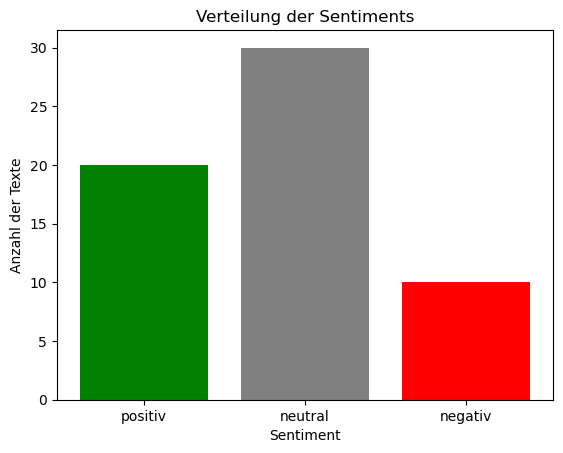

In [49]:
#visualisierung ergebniss
import matplotlib.pyplot as plt

# Beispiel Sentiment-Analyseergebnisse
sentiments = {'positiv': 20, 'neutral': 30, 'negativ': 10}

# Erstellen des Balkendiagramms
plt.bar(sentiments.keys(), sentiments.values(), color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Anzahl der Texte')
plt.title('Verteilung der Sentiments')
plt.show()


In [38]:
#dummytest
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
nlp = spacy.load('de_core_news_sm')
nlp.add_pipe('spacytextblob')

with open(r"C:\Users\Momo\Desktop\bsp.txt", 'r', encoding='UTF-8') as f:
    text = f.read()
doc = nlp(text)

In [39]:
doc._.subjectivity

0.0

In [40]:
doc._.polarity

0.0

In [41]:
doc._.assessments

[]

In [42]:
for span in doc.sents:
    print(span.text, span._.polarity)

Die Sonne scheint, und der Tag ist wunderschön.
 0.0
Leider hat es den ganzen Tag geregnet, und das hat meine Stimmung verdorben.
 0.0
Ich bin so aufgeregt, meine Freunde morgen wiederzusehen!
 0.0
Die Präsentation war informativ und gut strukturiert.
 0.0
Das Konzert gestern Abend war unglaublich, und die Band hat eine fantastische Show abgeliefert.
 0.0
Der Verlust des Fußballspiels war enttäuschend, aber wir geben nicht auf.
 0.0
Ich liebe es, Zeit mit meiner Familie zu verbringen; 0.0
es macht mich glücklich.
 0.0
Das Essen im neuen Restaurant war köstlich, und der Service war ausgezeichnet.
 0.0
Die langen Wartezeiten im Verkehrsstau haben meinen Stresspegel erhöht.
 0.0
Ich fühle mich gelangweilt, weil es nichts Interessantes zu tun gibt. 0.0


In [43]:
for span in doc.sents:
    blob = TextBlob(span.text, analyzer = NaiveBayesAnalyzer())
    print(span, blob.sentiment)

Die Sonne scheint, und der Tag ist wunderschön.
 Sentiment(classification='neg', p_pos=0.3127428127428125, p_neg=0.6872571872571863)
Leider hat es den ganzen Tag geregnet, und das hat meine Stimmung verdorben.
 Sentiment(classification='pos', p_pos=0.854960800216273, p_neg=0.14503919978372495)
Ich bin so aufgeregt, meine Freunde morgen wiederzusehen!
 Sentiment(classification='pos', p_pos=0.5624999999999999, p_neg=0.4374999999999999)
Die Präsentation war informativ und gut strukturiert.
 Sentiment(classification='pos', p_pos=0.7120874904067549, p_neg=0.2879125095932462)
Das Konzert gestern Abend war unglaublich, und die Band hat eine fantastische Show abgeliefert.
 Sentiment(classification='pos', p_pos=0.9289063315714129, p_neg=0.07109366842858779)
Der Verlust des Fußballspiels war enttäuschend, aber wir geben nicht auf.
 Sentiment(classification='pos', p_pos=0.7890551917680074, p_neg=0.2109448082319928)
Ich liebe es, Zeit mit meiner Familie zu verbringen; Sentiment(classification='pos

In [18]:
#versuch 3
import spacy
nlp = spacy.load("de_core_news_sm")

import numpy as np
import pandas as pd
import os

In [19]:
# Loading speech data:
opendiscourse = pd.read_csv(r"C:\Users\Momo\Desktop\speeches.csv")

In [41]:
extra_stop = ["herr", "dame", "präsident", "präsidentin", "bundespräsident", "bundespräsidentin", "frau", "damen", "herren", "kollege", "kollegin", "genau", "danke", "tagesordnungspunkt", "bitte", "nächster", "nächste", "redner", "rednerin"] # adapt if necessary
tokenized_corpus = [] # for the final tokenized corpus

def tokenize(a,b):
    # go through the entries for our time period
    for i in range(a,b): 
    
        # iterate through the 'speechContent' column in row i 
        # and replace all trailing new-line commands there with white space
        speech = opendiscourse['speechContent'].iloc[i].replace('\n', ' ').replace('\xa0',' ').replace('({','').replace('})','').replace('-','').replace('--','')       
    
    #print(i, speech)
    
        tokenized_speech = nlp(speech) # feed to our German language model
    
        speech_corpus = []
        for t in tokenized_speech:
            if not t.is_stop and not t.is_punct and not t.like_num and t.lemma_.lower() not in extra_stop:
                speech_corpus.append(t.lemma_.lower())
        while ' ' in speech_corpus:
                    speech_corpus.remove(' ')
    #mit .remove probieren
            
        tokenized_corpus.append(speech_corpus)

In [51]:
#clean list
tokenized_corpus.clear()
print(tokenized_corpus)

[]


In [50]:
# 2014-06-05 / 18039
tokenize(802050,802084)
print(tokenized_corpus)
one = tokenized_corpus

[['schließen', 'aussprache', 'präsidium', 'kolbe', 'schätzung', 'teilen', 'thema', 'sicher', 'län', 'g', 'beratungszeit', 'verdienen', 'ausdruck', 'nachweislich', 'deutlich', 'län', 'ger', 'debattieren', 'beginn', 'debatte', 'gemeinsam', 'beschließen', 'interfraktionell', 'überweisung', 'gesetzent', 'wurfs', 'drucksache', 'tag', 'ordnung', 'aufgeführt', 'ausschuß', 'vorschlagen', 'alternativ', 'vorschlag', 'fall', 'überweisung', 'beschließen', '--', 'beratung', 'bundesregierung', 'eingebracht', 'entwurf', 'gesetz', 'änderung', 'staatsangehörigkeitsgesetz', 'drucksach', 'überweisungsvorschlag', 'innenausschuss', 'auswärtiger', 'ausschuss', 'ausschuss', 'verbraucherschutz', '--', 'beratung', 'abgeordneter', 'jan', 'korte', 'sevim', 'dağdele', 'dr.', 'andré', 'hahn', 'abgeordneter', 'fraktion', 'linke', 'eingebracht', 'entwurf', 'gesetz', 'aufhebung', 'optionsregelung', 'staatsangehörigkeitsrecht', 'drucksache', 'überweisungsvorschlag', 'innenausschuss', 'ausschuss', 'verbraucherschutz', 

In [52]:
# 2014-07-03 / 18046
tokenize(803506,803532)
print(tokenized_corpus)
two = tokenized_corpus

[['schließen', 'sprache', 'abstimmung', 'bundesregierung', 'eingebracht', 'entwurf', 'gesetz', 'einstufung', 'weit', 'staat', 'sicher', 'herkunft', 'staat', 'erleichterung', 'arbeitsmarktzugang', 'asylbewerber', 'geduldet', 'ausländer', 'liegen', 'anzahl', 'erklärung', 'ge', 'schäftsordnung', 'vor.1', 'innenausschuss', 'empfehlen', 'buchstabe', 'ner', 'beschlussempfehlung', 'drucksache', 'gesetzentwurf', 'bundesregierung', 'drucksache', 'annehmen', 'gesetzentwurf', 'zustimmen', 'wol', 'le', 'handzeichen', 'stimmen', 'enthalten', 'gesetzentwurf', 'beratung', 'stimme', 'koalitionsfraktion', 'cdu/csu', 'spd', 'neinstimme', 'bündnis', 'grüne', 'linksfraktion', 'annehmen', 'beratung', 'schlussabstimmung', 'gesetzentwurf', 'zustimmen', 'erheben', 'stimmen', 'enthalten', 'gesetz', 'entwurf', 'zustimmung', 'cdu/csu', 'spd', 'ablehnung', 'fraktion', 'bündnis', 'grüne', 'linksfraktion', 'enthaltung', 'spd', 'annehmen', 'beschlussempfehlung', 'innenausschuss', 'trag', 'fraktion', 'linke', 'titel'

In [46]:
# 2019-05-16 / 19101
tokenize(871973,871995)
print(tokenized_corpus)

[['  ', 'schließen', 'aussprache', 'abstimmung', 'bundesregierung', 'eingebracht', 'gesetzentwurf', 'anpassung', 'betreuer', 'vormündervergütung', 'ausschuss', 'verbraucherschutz', 'empfehlen', 'beschlussempfehlung', 'drucksache', 'gesetzentwurf', 'bundesregierung', 'drucksach', 'annehmen', 'gesetzentwurf', 'zustimmen', 'handzeichen', 'stimmen', 'enthalten', 'gesetzentwurf', 'beratung', 'stimme', 'koalitionsfraktion', 'afdfraktion', 'fraktion', 'linke', 'fraktion', 'bündnis', 'grüne', 'enthaltung', 'fdpfraktion', 'annehmen', 'beratung', 'schlussabstimmung', 'gesetzentwurf', 'zustimmen', 'erheben', 'stimmen', 'enthalten', 'gesetzentwurf', 'stimme', 'de', 'r', 'koalitionsfraktion', 'afdfraktion', 'fraktion', 'linke', 'fraktion', 'bündnis', 'grüne', 'enthaltung', 'fdpfraktion', 'annehmen'], ['  ', 'verehrt', 'bundesregierung', 'bringen', 'entwurf', 'gesetz', 'änderung', 'staatsangehörigkeitsgesetz', 'klingen', 'rechtstechnik', 'verbergen', 'dringender', 'sicherheitspolitisch', 'anliegen',

In [48]:
# 2019-06-27 / 19107
tokenize(873697,873735)
print(tokenized_corpus)

[['  ', 'geehrt', 'lieb', 'staatsbürgerschaft', 'intensivst', 'form', 'bindung', 'staat', 'staat', 'mensch', 'umfangreicher', 'verhältnis', 'staat', 'bürger', 'zugestehen', 'staatsbürgerschaft', 'umfassen', 'vielzahl', 'unveräußerlich', 'frei', 'bürger', 'staat', 'umfassend', 'schutzversprechen', 'ausland', 'kriterium', 'erlangung', 'recht', 'grund', 'hoch', 'maßstäb', 'genügen', 'vorliegend', 'gesetzentwurf', 'stück', 'zentral', 'gesellschaftlich', 'wert', 'voraussetzung', 'erklären', 'bewerberin', 'bewerber', 'erlangung', 'deutsch', 'staatsangehörigkeit', 'ermöglichen', 'unser', 'grundgesetz', 'lieb', 'artikel', 'absatz', 'grundrecht', 'sinn', 'institutsgarantie', 'anlegen', 'tragend', 'strukturprinzipium', 'ehe', 'sogenannter', 'mehreh', 'geradezu', 'form', 'paradebeispiel', 'unvereinbar', 'respektieren', 'schützen', 'staat', 'zulassen', 'vollkommen', 'anderer', 'eheverständnis', 'hoffähig', 'eheverständnis', 'vollkommen', 'mensch', 'rollenbild', 'korrespondieren', 'lieb', 'grüne', 

In [35]:
# 2021-04-22 / 19224
tokenize(906355,906360)
print(tokenized_corpus)

[['  ', 'lieb', 'redezeit', 'anzeigen', 'bekommen', 'ausschöpfen', 'mal', 'leben', 'mitglied', 'fdpfraktion', 'trotz', 'sympathie', 'einzeln', 'mitglied', 'derselbigen', 'lieb', 'gesetzgebung', 'denken', 'insbesondere', 'bestimmt', 'mensch', 'widmen', 'opfer', 'ns', 'staatsangehörigkeit', 'unterschiedlich', 'grund', 'verlieren', 'nachkomme', 'initiative', 'article', 'exclusion', 'group', 'nick', 'courtman', 'sorgfalt', 'sachlichkeit', 'intensität', 'sorgen', 'gesetzgebung', 'primär', 'leistung', 'leistung', 'verdienen', 'hoch', 'respekt', 'anderthalb', 'anhörung', 'beeindruckend', 'demonstrieren', 'schaum', 'vor', 'mund', 'erstaunlich', 'weise', 'demut', 'stichwort', 'konzentrieren', 'stichwort', 'lauten', 'scham', 'stolz', 'person', 'demut', 'konsequenz', 'scham', 'angebracht', 'brauchen', 'weg', 'einschlagen', 'nachvollziehbar', 'jahrzehnt', 'aufgrund', 'administrativ', 'beschränkung', 'aufgrund', 'fehlend', 'gesetzlich', 'möglichkeit', 'staatsangehörigkeit', 'wünschen', 'wiederzuerl

In [38]:
print(tokenized_corpus)

[]


In [53]:
list = one.extend(two)
print(list)

None
